# ORIE 4580/5580/5581 Assignment 4

#### Students: Mingfei Liao (ml2489) and Jijuan Xu (jx286)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

In [ ]:
import numpy as np
import math

num_passenger = 10000
interval = 1000
train_period = 10

np.random.seed(42)
arrival_times = np.random.uniform(0, interval, size=num_passenger)
arrival_times.sort()

#since there is a train coming every 10 minute, the arriving passenger
#will only get on the next train within 10 minutes. But we need to
#sequence the next train as well.
next_trains = np.ceil(arrival_times / train_period) * train_period

#now that we sequenced the train, wait should be between 0 and 10
waits = next_trains - arrival_times

mean = np.mean(waits)
std = np.std(waits, ddof=1)
se_mean = std / np.sqrt(len(waits))
ci_upper = mean + 1.96*se_mean
ci_lower = mean - 1.96*se_mean

print("The expected wait time is: " ,mean)
print("The 95% condifence interval is: ", ci_lower, ci_upper)


The expected wait time is:  5.017442315700333
The 95% condifence interval is:  4.960813026118842 5.074071605281825


<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.

In [ ]:
mean_interarrival = 10

#we drafted with ChatGPT to find a way to simulate the exponential distributed
#new train arrival times. We also generated this way over the passenger arrival
train_times = []
t = 0

while t <= arrival_times[-1] + 100:
  inter = np.random.exponential(scale = mean_interarrival)
  t += inter
  train_times.append(t)

#make the train arrival times into an array so we can identify the next train
train_times = np.array(train_times)

index = np.searchsorted(train_times, arrival_times, side = "left")
next_trains = train_times[index]
waits = next_trains - arrival_times

mean = np.mean(waits)
std = np.std(waits, ddof=1)
se_mean = std / np.sqrt(len(waits))
ci_upper = mean + 1.96*se_mean
ci_lower = mean - 1.96*se_mean

print("The expected wait time is: " ,mean)
print("The 95% condifence interval is: ", ci_lower, ci_upper)





The expected wait time is:  9.672482154442065
The 95% condifence interval is:  9.500387157611481 9.844577151272649


<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [ ]:
num_intervals = 10000
inter = np.random.exponential(scale = mean_interarrival, size = num_intervals)

mean = np.mean(inter)
std = np.std(inter, ddof=1)
se_mean = std / np.sqrt(num_intervals)
ci_upper = mean + 1.96*se_mean
ci_lower = mean - 1.96*se_mean

print("The expected interarrival time is: " ,mean)
print("The 95% condifence interval is: ", ci_lower, ci_upper)


The expected interarrival time is:  10.16614726201134
The 95% condifence interval is:  9.966494117468171 10.365800406554508


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

In [7]:
#part a, train everu 10 minutes
train_times_a = np.arange(0, interval + 20, 10)
index_a = np.searchsorted(train_times_a, arrival_times)
interarrival_a = train_times_a[index_a] - train_times_a[index_a -1]

a_mean = np.mean(interarrival_a)
a_std = np.std(interarrival_a, ddof=1)
a_se = a_std / np.sqrt(len(interarrival_a))
a_ci_upper = a_mean + 1.96*a_se
a_ci_lower = a_mean - 1.96*a_se

print("The part a expected interarrival time is: " , a_mean)
print("The part a 95% condifence interval is: ", a_ci_lower, a_ci_upper)


#part b exponential distribution
train_times_b = [0]
while train_times_b[-1] <= arrival_times[-1] + 20:
  train_times_b.append(train_times_b[-1]+np.random.exponential(mean_interarrival))
train_times_b = np.array(train_times_b)

index_b = np.searchsorted(train_times_b, arrival_times)
interarrival_b = train_times_b[index_b] - train_times_b[index_b -1]

b_mean = np.mean(interarrival_b)
b_std = np.std(interarrival_b, ddof=1)
b_se = b_std / np.sqrt(len(interarrival_b))
b_ci_upper = b_mean + 1.96*b_se
b_ci_lower = b_mean - 1.96*b_se


print("The part b expected interarrival time is: " , b_mean)
print("The part b 95% condifence interval is: ", b_ci_lower, b_ci_upper)

The part a expected interarrival time is:  10.0
The part a 95% condifence interval is:  10.0 10.0
The part b expected interarrival time is:  20.645354822347894
The part b 95% condifence interval is:  20.369341125137222 20.921368519558566


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

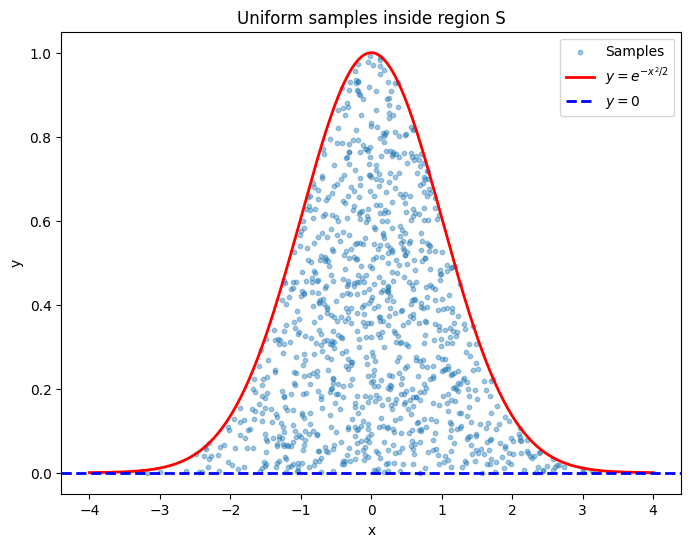

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000

# generate unif rvs
X = np.random.randn(n)

# line y = e^(-x^2/2)
Y = np.random.uniform(0, np.exp(-X**2 / 2))

# plot
plt.figure(figsize=(8,6))
plt.scatter(X, Y, alpha=0.4, s=10, label="Samples")

# Plot the boundary curve y = exp(-x^2/2)
x_vals = np.linspace(-4, 4, 400)
plt.plot(x_vals, np.exp(-x_vals**2 / 2), 'r', linewidth=2, label=r"$y = e^{-x^2/2}$")
plt.axhline(0, color="blue", linestyle="--", linewidth=2, label=r"$y=0$")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Uniform samples inside region S")
plt.legend()
plt.show()

<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.
The points are not uniformly distributed on the circumference of the circle, as the histogram of theta does not lie flat across (-π, π).

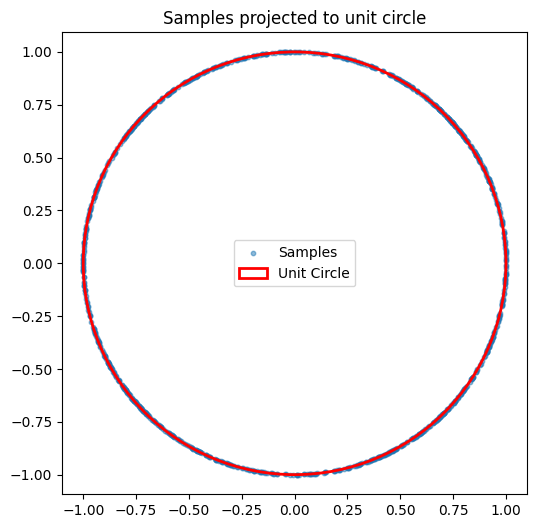

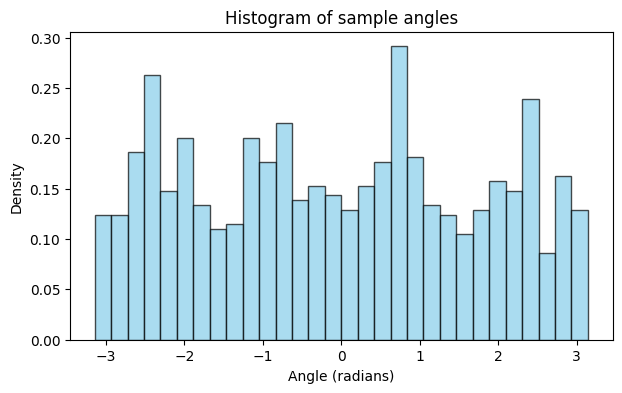

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000

# unif rvs
U = np.random.uniform(-1, 1, n)
V = np.random.uniform(-1, 1, n)

# unit circle projection
norms = np.sqrt(U**2 + V**2)
X = U / norms
Y = V / norms

plt.figure(figsize=(6,6))
plt.scatter(X, Y, alpha=0.5, s=10, label="Samples")
circle = plt.Circle((0,0), 1, color='r', fill=False, linewidth=2, label="Unit Circle")
plt.gca().add_artist(circle)

plt.axis("equal")
plt.title("Samples projected to unit circle")
plt.legend()
plt.show()

# hist
angles = np.arctan2(Y, X)
plt.figure(figsize=(7,4))
plt.hist(angles, bins=30, density=True, alpha=0.7, color="skyblue", edgecolor="black")
plt.xlabel("Angle (radians)")
plt.ylabel("Density")
plt.title("Histogram of sample angles")
plt.show()


<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.
Yes, the points are uniformly distributed on the circumference of the circle. In part c, the points have rotational symmetry, and the histogram of theta is correspondingly much flatter across (-π, π).  

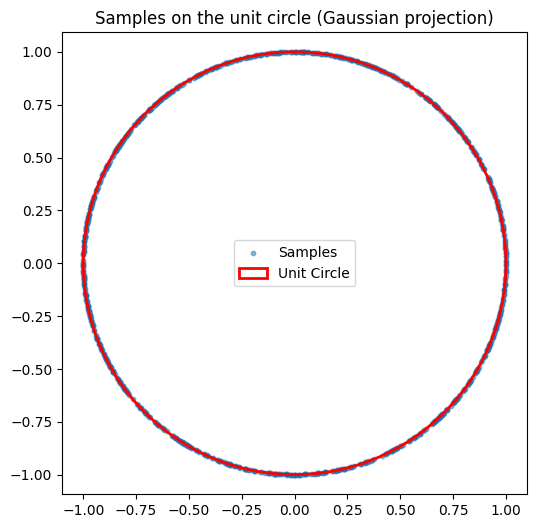

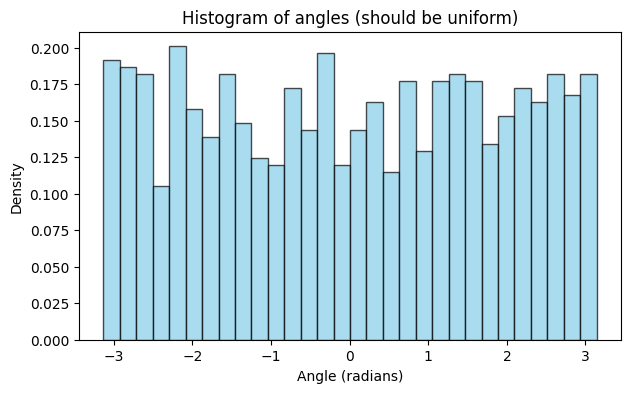

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
Z = np.random.randn(n)
W = np.random.randn(n)

# unit circle projection
norms = np.sqrt(Z**2 + W**2)
X = Z / norms
Y = W / norms

# scatter plot
plt.figure(figsize=(6,6))
plt.scatter(X, Y, alpha=0.5, s=10, label="Samples")
circle = plt.Circle((0,0), 1, color='r', fill=False, linewidth=2, label="Unit Circle")
plt.gca().add_artist(circle)

plt.axis("equal")
plt.title("Samples on the unit circle (Gaussian projection)")
plt.legend()
plt.show()

angles = np.arctan2(Y, X)
plt.figure(figsize=(7,4))
plt.hist(angles, bins=30, density=True, alpha=0.7, color="skyblue", edgecolor="black")
plt.xlabel("Angle (radians)")
plt.ylabel("Density")
plt.title("Histogram of angles (should be uniform)")
plt.show()

<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.
$$R_{stocks} \sim N(0.14,\, 0.25^2)$$
$$R_{bonds} \sim N(0.07,\, 0.1^2)$$
$$R_{EM} \sim N(0.16,\, 0.3^2)$$
And, $P(R>0) = 1 - \phi(\frac{0-\mu}{\sigma}) = \phi(\frac{\mu}{\sigma})$


$P(R_{stocks}>0) = \phi(\frac{0.14}{\sqrt{0.0625}}) = \phi(0.56) \approx 0.7123$

$P(R_{bonds}>0) = \phi(\frac{0.07}{\sqrt{0.001}}) = \phi(0.70) \approx 0.7580$

$P(R_{EM}>0) = \phi(\frac{0.16}{\sqrt{0.009}}) = \phi(0.53) \approx 0.7030$

So, $P(\text{all positive}) = P(R_{stocks}>0) * P(R_{bonds}>0) * P(R_{EM}>0) \approx 0.38$




<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.
For a uniform distribution Unif(a, b), the mean of a uniform distribution is $\frac{a + b}{2}$ and the variance is $\frac{(b - a)^2}{12}.$

So, we can find α and β by solving
$\frac{a + b}{2} = 0$
&
$\frac{(b - a)^2}{12} = 1$

From here, using algebra we get
$ b = -a$
and plug into variance formula to find
$$\sqrt{(b-a)^2} = 12$$
$$b - a = \sqrt{12}$$
$$2b = \sqrt{12} = 2\sqrt{3}
$$
$$b = \sqrt{3}, a = -\sqrt{3}
$$

<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.
From part a, by linearity of expectation, since $E[X1] = E[X2] = 0$,

$$E[V2] = (1-p) E[X1] + pE[X2]
$$
$$E[V2] = 0
$$
Similarly, by the law of total variance,
$$Var[V2] = E[Var(V2 | B)] + Var(E[V2 | B])
$$
$$Var[V2] = 1 + 0
$$
$$Var[V2] = 1
$$


In [ ]:
import numpy as np
import scipy.stats as stats
np.random.seed(42)
num_samples = 100000

# bernoulli var
p = 0.5
B = np.random.binomial(1, p, num_samples)

# unif rv
alpha = -np.sqrt(3)
beta = np.sqrt(3)
X1 = np.random.uniform(alpha, beta, num_samples)
X2 = np.random.uniform(alpha, beta, num_samples)
V1, V2 = np.zeros(num_samples), np.zeros(num_samples)
# V1 and V2
for i in range(num_samples):
  V1[i] = X1[i]
  if B[i] == 0:
    V2[i] = X1[i]
  else:
    V2[i] = X2[i]

# find expectation and variance
mean_V2 = np.mean(V2)
var_V2 = np.var(V2)

print("E[V2]: ", mean_V2)
print("Var[V2]: ", var_V2)

# pt c
# cov(V1, V2)
cov_V1_V2 = np.sum((V1 - np.mean(V1)) * (V2 - np.mean(V2))) / (num_samples - 1)
print("Cov(V1, V2): ", cov_V1_V2)
# stdev V1, V2
std_V1 = np.std(V1, ddof=1)
std_V2 = np.std(V2, ddof=1)
print("Stdev(V1): ", std_V1)
print("Stdev(V2): ", std_V2)

E[V2]:  0.00017002423339682122
Var[V2]:  1.0001648832610834
Cov(V1, V2):  0.501356540019003
Stdev(V1):  1.0000574559125033
Stdev(V2):  1.0000874386822052


<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

## Ans.
$$Cov(V1, V2) = E[V1V2] - E[V1]E[V2]
$$

$$Cov(V1, V2) = E[V1V2]
$$

$$V1 * V2 = X1 [(1-p)X1 + pX2]
$$

$$V1 * V2 = (1-B) X1^2 + B(X1X2)
$$

$$E[V1V2] = E[(1-p) X1^2 + p(X1X2)] = (1-p)E[X1^2] + pE[X1X2]
$$

$$E[(1-p) X1^2 + p(X1X2)] = (1-p)(1) + p(0) = 1 - p
$$
$$
Cov(V1, V2) = 1 - p
$$
for any value of 0 <= σ_12 <= 1.

<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

## Ans.

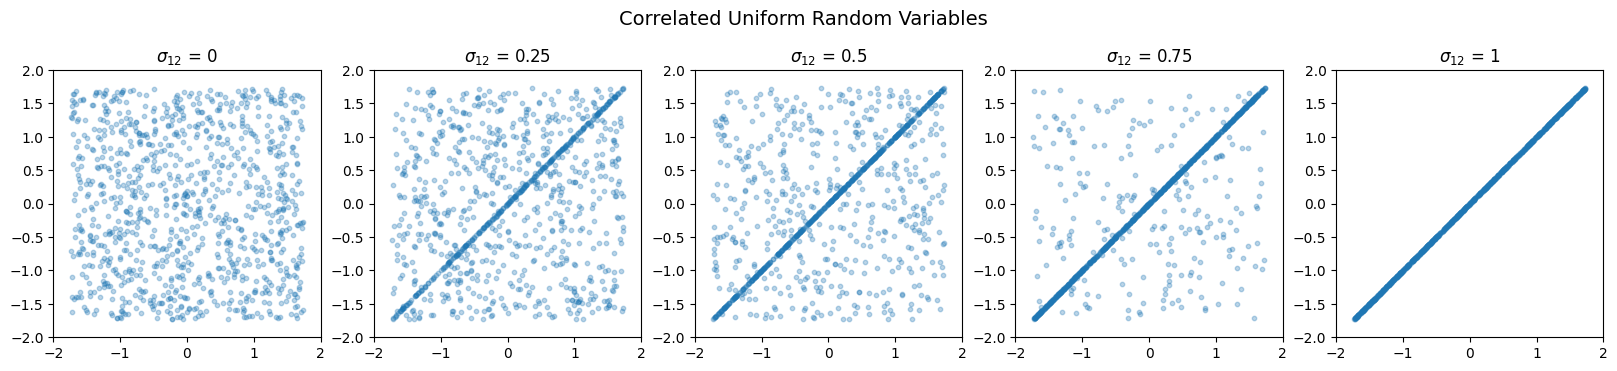

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def generate_correlated_uniforms(num_samples, alpha, beta, sigma12):
  p = 1 - sigma12
  B = np.random.binomial(1, p, num_samples)
  X1 = np.random.uniform(alpha, beta, num_samples)
  X2 = np.random.uniform(alpha, beta, num_samples)
  V1 = X1
  V2 = (1-B)*X1 + B*X2
  return V1, V2

n = 1000
sigma_vals = [0, 0.25, 0.5, 0.75, 1]
fig, axes = plt.subplots(1, len(sigma_vals), figsize=(20,4))
for i, sigma in enumerate(sigma_vals):
  V1, V2 = generate_correlated_uniforms(n, -np.sqrt(3), np.sqrt(3), sigma)
  axes[i].scatter(V1, V2, alpha=0.3, s=10)
  axes[i].set_title(f"$\\sigma_{{12}}$ = {sigma}")
  axes[i].set_xlim(-2,2)
  axes[i].set_ylim(-2,2)
  axes[i].set_aspect("equal")

plt.suptitle("Correlated Uniform Random Variables", fontsize=14)
plt.show()
# used ChatGpt to assist in plotting

<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

In [ ]:
n = 1000000
sigma12 = 0.5

V1, V2 = generate_correlated_uniforms(n, -np.sqrt(3), np.sqrt(3), sigma12)

# estimate probability
prob = np.mean((V1 <= 0) & (V2 <= 0))
print("P[V1 <= 0, V2 <= 0] (sigma12=0.5):", prob)

P[V1 <= 0, V2 <= 0] (sigma12=0.5): 0.37508


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.


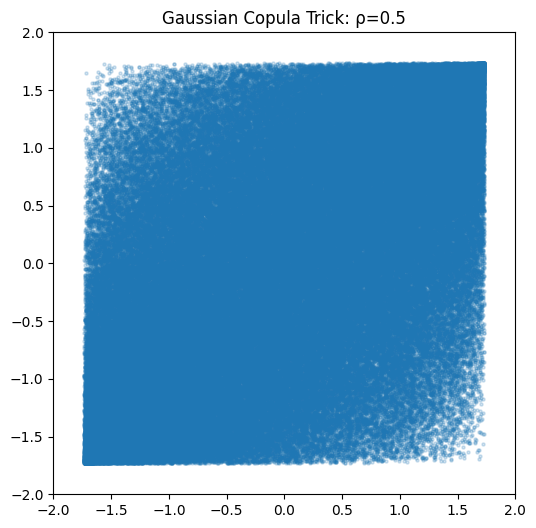

P[W1 >= 0, W2 >= 0]: 0.332565


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# chatGPT used to assist in cleaning code

def gaussian_copula_uniforms(n, rho, alpha, beta, seed=42):
    np.random.seed(seed)
    # covariance matrix
    Sigma = np.array([[1, rho],[rho, 1]])
    # generate multivariate normals
    Z = np.random.multivariate_normal(mean=[0,0], cov=Sigma, size=n)
    Z1, Z2 = Z[:,0], Z[:,1]
    # transform to uniforms using Phi (CDF of standard normal)
    U1, U2 = norm.cdf(Z1), norm.cdf(Z2)

    # scale to [alpha, beta]
    W1 = alpha + (beta - alpha) * U1
    W2 = alpha + (beta - alpha) * U2
    return W1, W2

# parameters
n = 200000
rho = 0.5
alpha, beta = -np.sqrt(3), np.sqrt(3)

# generate uniforms via Gaussian copula
W1, W2 = gaussian_copula_uniforms(n, rho, alpha, beta)

# scatter plot
plt.figure(figsize=(6,6))
plt.scatter(W1, W2, alpha=0.2, s=5)
plt.title("Gaussian Copula Trick: ρ=0.5")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.gca().set_aspect("equal")
plt.show()

# probability of both being nonnegative
prob = np.mean((W1 >= 0) & (W2 >= 0))
print("P[W1 >= 0, W2 >= 0]:", prob)
